In [210]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time

In [211]:
data = pd.read_excel('q1train.xlsx')
test = pd.read_excel('q1test.xlsx')
x_test = np.array(test.iloc[:,:2])

data.head()

,Aptitude,Verbal,Label
0,34.723660,30.386711,0
1,30.386711,35.947409,0
2,35.947409,60.282599,0
3,45.183277,61.206665,0
4,95.961555,75.113658,0


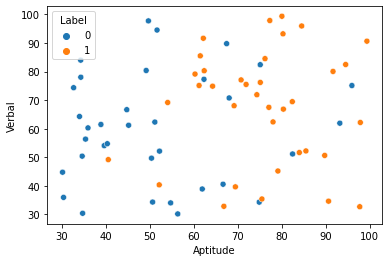

In [212]:
sns.scatterplot(data = data, x = data['Aptitude'], y = data['Verbal'], hue = data['Label'])
t =140


In [213]:
w = np.array([1,1,1])
x = np.array(data.iloc[:,:2])
y = np.array(data['Label'])
y_= np.array(data['Label'].replace(to_replace=0, value=-1)).reshape(70,1)
w = np.ones((x.shape[1],1))


------------------------------(A) Single Layer Perceptron-----------------------------------------
Weights Obtained:
[[-4.        ]
 [ 1.54170043]
 [ 0.79984075]]
learning rate:  0.1
----------------------------------------------------------------------------------------------


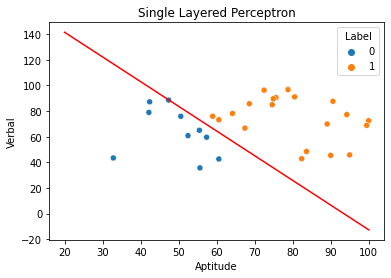

In [214]:


def perceptron(X,Y,alpha):
    y = Y
    x = np.hstack((np.ones(Y.shape),X))
    w = np.ones((x.shape[1],1)).reshape(3,1)

    for i in range(50):
        for xx, yy in zip(x, y):
            if np.dot(xx, w) >0:
                pp = 1
            else:
                pp=-1
            if(pp==yy):
                continue
            w+= alpha*xx.reshape(3,1)*(yy)
    return w

def pred(X, w):
    x = np.hstack((np.ones((X.shape[0],1)),X))
    act_input = np.dot(x,w)  
    prediction = np.where(act_input>t, 1,0)
    return prediction

weights = perceptron(x,y_,0.1)

print('------------------------------(A) Single Layer Perceptron-----------------------------------------')
print('Weights Obtained:')
print(weights)
print('learning rate: ', 0.1)
test['Label'] = pred(x_test, weights)[:] 
a = np.linspace(20,100,1000)
b =(t - weights[0] -  weights[1]*a)/weights[2]
sns.scatterplot(data = test, x = test['Aptitude'], y = test['Verbal'], hue = test['Label'])
plt.plot(a,b,'r')

plt.title('Single Layered Perceptron')
print('----------------------------------------------------------------------------------------------')



In [215]:
test

,Aptitude,Verbal,Label
0,32.822833,43.407173,0
1,64.139320,78.131688,1
2,72.446494,96.327593,1
3,60.557886,73.194998,1
4,58.940956,75.958448,1
5,99.927858,72.469252,1
6,47.364269,88.575865,0
7,50.558160,75.909860,0
8,60.555556,42.608409,0
9,82.326662,42.819879,1


In [216]:
theta_initial = np.array([0.1,0.1,0.1]).reshape(-1,1)
x = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, -1]).reshape(-1,1)
theta_initial = np.array([0.1,0.1,0.1]).reshape(-1,1)

In [217]:
def sigmoid(x):
    val = (1.0/(1.0+np.exp(-x)))
    return val

def grad(X, Y, theta):
    val = np.dot(X.transpose(),sigmoid(np.dot(X, theta)) -Y)/len(Y)
    return val

def logistic_clf(x,y,theta,alpha, iterations):
    z = 1.e-10
    print("----------------------------------------------------------")
    print("Logistic Regression")
    x_only = x
    x = np.hstack((np.ones((y.shape[0],1)), x))
    error = 100.0
    cost_vs_itr = []
    count = 0
    sig = sigmoid(np.dot(x, theta))
    cost = -(y*(np.log(sig+z))+((1-y)*np.log(1-sig +z))).mean()

    begin = time.time()
    while error> 1.e-7:
        theta = theta - alpha*(grad(x,y,theta))
        sig = sigmoid(np.dot(x, theta))
        cost_new = (-y*(np.log(sig+z))-((1-y)*np.log(1-sig +z))).mean()
        error = abs(cost_new - cost)
        cost_vs_itr.append([cost_new, count])
        cost = cost_new
        count+=1
    end = time.time()
    # plt.plot(np.dot(x, theta), sig)
    # plt.ylabel("G(z)")
    # plt.xlabel("z")
    print("Number of Iterations: ",count)
    print("Time Taken: ", end - begin)
    print("The Values of theta for Logistic regression",theta)
    print("The Final cost is: ", cost_new)
    print("----------------------------------------------------------")
    return theta, pd.DataFrame(cost_vs_itr)

theta, graph = logistic_clf(x , y, theta_initial, 0.001,10000)
logistic_reg_theta = theta





----------------------------------------------------------
Logistic Regression
Number of Iterations:  189561
Time Taken:  19.154870986938477
The Values of theta for Logistic regression [[-4.71972859]
 [ 0.06900916]
 [ 0.00665459]]
The Final cost is:  0.480046705755547
----------------------------------------------------------


<AxesSubplot:title={'center':'Logistic Classifier'}, xlabel='Aptitude', ylabel='Verbal'>

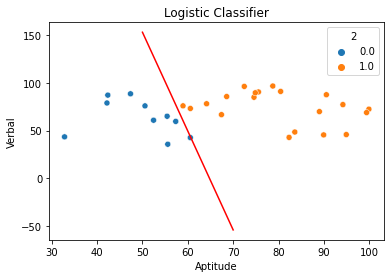

In [218]:
def y_prediction(x, theta):
    # X = np.hstack((np.ones((x.shape[0],1)),x))
    Y = np.ones((x.shape[0],1))
    val = sigmoid(np.dot(x, theta))
    rep = np.where(val<0.5)
    Y[rep] = 0
    return Y
x_test = np.array(test.iloc[:])
y_pred = y_prediction(x_test, theta).astype(np.uint8)
plt.figure()
plt.title("Logistic Classifier")
plt.xlabel("Aptitude")
plt.ylabel("Verbal")
a = np.linspace(50,70,1000)
b =(-0.25 - theta[0] -  theta[1]*a)/theta[2]
plt.plot(a,b,'r')

df = pd.DataFrame(np.hstack((x_test, y_pred)))
sns.scatterplot(data = df, x = df.iloc[:,0], y= df.iloc[:,1], hue=2)

In [219]:
#Multi-layer-perceptron

data = pd.read_excel('q1train.xlsx')
test = pd.read_excel('q1test.xlsx')
x_test = np.array(test.iloc[:,:2])
data.head()

,Aptitude,Verbal,Label
0,34.723660,30.386711,0
1,30.386711,35.947409,0
2,35.947409,60.282599,0
3,45.183277,61.206665,0
4,95.961555,75.113658,0


In [220]:
w = np.array([1,1,1])
x = np.array(data.iloc[:,:2])
y = np.array(data['Label'])
y_= np.array(data['Label'].replace(to_replace=0, value=-1)).reshape(70,1)
w = np.ones((x.shape[1],1))
print(w.shape)
w = np.vstack((np.ones((1,1)), w))
w

(2, 1)


array([[1.],
       [1.],
       [1.]])

In [221]:

def sigmoid(x):
    val = (1.0/(1.0+np.exp(-x)))
    return val

def sigmoid_grad(x):
    # val = np.zeros(x.shape)
    val = sigmoid(x)*(1-sigmoid(x))
    return val

def predict(w1, w2 ,X):
    # y = Y.reshape((X.shape[0],1))
    x = np.hstack((np.ones((X.shape[0],1)),X))
    hidden = x.dot(w1.T)
    activated1 =sigmoid(hidden)
    activated1 = np.concatenate([np.ones((activated1.shape[0], 1)), activated1], axis=1)
    final = activated1.dot(w2.T)
    activated2 = sigmoid(final)
    return x, activated1, activated2

def cost(W1, W2, X, Y):
    w1 = W1
    w2 = W2
    J = 0

    grad_w1 = np.zeros(w1.shape)
    grad_w2 = np.zeros(w2.shape)
    m = Y.size
    a1, a2, a3 = predict(w1, w2, X)
    J = (-1 / m) * np.sum((np.log(a3) * Y) + np.log(1 - a3) * (1 - Y))
    
    d3 = a3 - Y.reshape((70,1))
    d2 = d3.dot(w2)[:, 1:]*sigmoid_grad(a1.dot(w1.T))
    D1 = d2.T.dot(a1)
    D2 = d3.T.dot(a2)
    #print(sigmoid_grad(a1.dot(w1.T)))
    grad_w1 = (1/m)*D1
    grad_w2 = (1/m)*D2

    return J, grad_w1, grad_w2

w1 = np.random.random((3,3))
w2 = np.random.random((1,4))

for i in range(10000):
    k, wc1, wc2 = cost(w1,w2,x,y)
    w1 = w1 - 0.01*wc1
    w2 = w2 - 0.01*wc2
pred = np.where(predict(w1, w2, x_test)[2]>0.5,1,0)



------------------------------(A) Multiple Layer Perceptron-----------------------------------------
Weights Obtained:
w1: [[0.1323729  0.92720419 0.07007339]
 [0.24622899 0.93858755 0.99698506]
 [0.13442933 0.21540857 0.73310322]]
w2: [[ 0.15066046  0.13290577 -0.24683083  0.02042302]]
----------------------------------------------------------------------------------------------


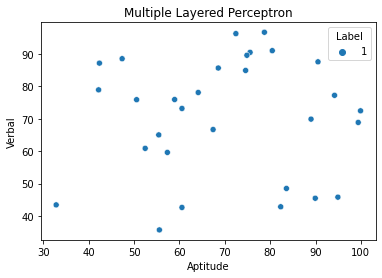

In [222]:


print('------------------------------(A) Multiple Layer Perceptron-----------------------------------------')
print('Weights Obtained:')
print('w1:', w1)
print('w2:', w2)
test['Label'] = pred[:]
sns.scatterplot(data = test, x = test['Aptitude'], y = test['Verbal'], hue = test['Label'])
plt.title('Multiple Layered Perceptron')
print('----------------------------------------------------------------------------------------------')